In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import numpy as np
from tqdm.notebook import tqdm#barrita
import illustris_python as il

#importar funciones de circularidad
from circularity import spherical_coords_from_vector             #formato: spherical_coords_from_vector(vector)
from circularity import matrix_from_spherical                    #formato: matrix_from_spherical(r,theta,phi)
from circularity import inertia_tensor                           #formato: inertia_tensor(Masas, Coordenadas, Centralpos)
from circularity import diagonalization_of_inertia               #formato: diagonalization_of_inertia(I)
from circularity import star_particles_rotated_once_eulermethod  #formato: star_particles_rotated_once_eulermethod(subhaloid, snapshotnum, basepath,radius_limit,minmetal,maxmetal)
from circularity import star_particles_rotated_once              #formato: star_particles_rotated_once(subhaloid, snapshotnum, basepath,radius_limit,minmetal,maxmetal)
from circularity import circularities_eulermethod                #formato: circularities_eulermethod(subhaloID,snapNum,basepath,radius_limit,metallicity_cutoff,radius_limit_rotation,minmetal_rotation,maxmetal_rotation)
from circularity import circularities_diagmethod                 #formato: circularities_diagmethod(subhaloID,snapNum,basepath,radius_limit,metallicity_cutoff,radius_limit_rotation,minmetal_rotation,maxmetal_rotation)



  0%|          | 0/13 [00:00<?, ?it/s]

Text(0,0.5,'Total Subhalo Mass [code units]')

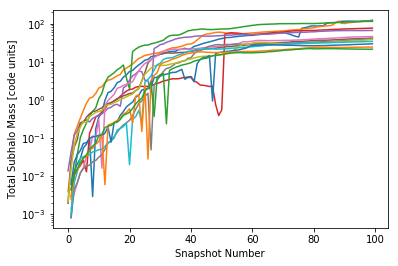

In [2]:
"""
Subhalos con componente contrarotante del 5% mas extenso 
[455291.0, 478216.0, 501208.0, 531910.0, 547844.0, 570319.0, 571633.0, 582137.0, 589496.0, 598112.0, 606820.0, 619381.0, 628949.0]
"""
contrarotantes_extensos = [455291.0, 478216.0, 501208.0, 531910.0, 547844.0, 570319.0, 571633.0, 582137.0, 589496.0, 598112.0, 606820.0, 619381.0, 628949.0]
basepath = '/home/tnguser/sims.TNG/TNG50-1/output'


fields = ['SubhaloMass','SubfindID','SnapNum']
for i in tqdm(range(len(contrarotantes_extensos))):
    subhaloid = contrarotantes_extensos[i]
    
    tree = il.sublink.loadTree(basepath,99,subhaloid,fields=fields,onlyMPB=True)
    plt.plot(tree['SnapNum'],tree['SubhaloMass'],'-')
    continue

plt.yscale('log')
plt.xlabel('Snapshot Number')
plt.ylabel('Total Subhalo Mass [code units]')

In [3]:
contrarotantes_extensos = [455291.0, 478216.0, 501208.0, 531910.0, 547844.0, 570319.0, 571633.0, 582137.0, 589496.0, 598112.0, 606820.0, 619381.0, 628949.0]
basepath = '/home/tnguser/sims.TNG/TNG50-1/output'


fields = ['SubhaloMass','SubfindID','SnapNum','SubfindID']
for i in tqdm(range(len(contrarotantes_extensos))):
    subhaloid = contrarotantes_extensos[i]
    
    tree = il.sublink.loadTree(basepath,99,subhaloid,fields=fields,onlyMPB=True)
    print(tree['SnapNum'],tree['SubfindID'])
    if i == 1:
        break
    continue

  0%|          | 0/13 [00:00<?, ?it/s]

[99 98 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75
 74 73 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50
 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25
 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1] [455291 451922 447482 441852 436294 432854 424791 422498 419982 412528
 408257 404168 404700 395639 395620 388923 381296 376991 378498 371611
 367646 365126 363372 360492 363449 360989 358819 358815 355982 355147
 415792 412041 409596 408179 404459 398111 394513 391787 387880 385462
 382939 377593 372755 366979 360195 352926 347762 340064 336299 331278
 326852 326208 321364 316813 308298 300943 294478 286186 281659 294851
 288087 250791 240751 226959 211102 201605 195177 189226 179718 184790
 178963 148696 154719 173681 162479 141550 138468 132181 124592 113393
 109220  97188  85178  78142  78824  76310  68711  53926  52308  51185
 106787  90328  92747  77270  68782 106423  71672  95856 50

In [4]:
"""Visualizacion basica de 1 subhalo en 1 snapshot"""

basepath = '/home/tnguser/sims.TNG/TNG50-1/output'

SubhaloID = 547844
snapNum = 99
R_gal = 120


stars = circularities_eulermethod(SubhaloID,snapNum,basepath,radius_limit=1.0*R_gal,minmetal=0.05,maxmetal=3.0,radius_limit_rotation=0.2*R_gal,minmetal_rotation=0.95,maxmetal_rotation=1.5)
#star = star_particles_rotated_once_eulermethod(SubhaloID, 478216snapNum, basepath,0.2*R_gal/0.667,0.95,1.5)

5.35014253553
[[ -2.17972627e-08   5.19753275e-08   2.14458871e+08]]
-----------------------
 [ -1.35139635e+07  -1.06996774e+07   5.93055073e+08]


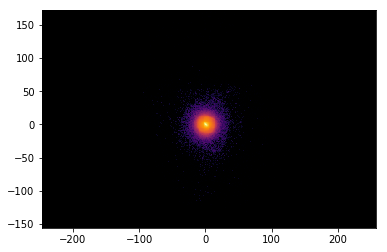

In [5]:
plt.hist2d(stars['Coordinates'][:,0],stars['Coordinates'][:,1],bins=256,cmap='inferno',norm=mpl.colors.LogNorm())
plt.axis('equal')
ax = plt.gca()
ax.set_facecolor('black')
plt.show()

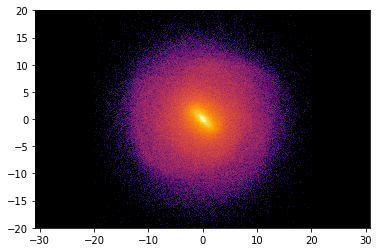

In [6]:

plt.hist2d(stars['Coordinates'][:,0],stars['Coordinates'][:,1],bins=256,cmap='inferno',norm=mpl.colors.LogNorm(),range=[[-20, 20], [-20, 20]])
plt.axis('equal')
ax = plt.gca()
ax.set_facecolor('black')
plt.show()

In [21]:
stars['Coordinates'][:,0],stars['Coordinates'][:,1],stars['Coordinates'][:,2]

(array([  2.93050576e-02,  -2.27803718e-03,   1.56652506e-01, ...,
         -3.79123181e+01,   3.06036935e+01,   2.73735445e+01]),
 array([ -1.87899429e-02,   3.48873917e-02,  -1.27387567e-01, ...,
         -5.07310943e+01,   1.02063633e+02,   1.08900049e+02]),
 array([  5.02825382e-02,   1.68612357e-02,  -2.82563722e-03, ...,
          5.94416847e+01,   1.44490105e+01,   2.49049700e+01]))

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

basepath = '/home/tnguser/sims.TNG/TNG50-1/output'
galaxyid = 478216
fields = ['SubhaloMass','SubfindID','SnapNum','SubfindID']

tree = il.sublink.loadTree(basepath,99,galaxyid,fields=fields,onlyMPB=True)
how
SubhaloID_history = tree['SubfindID']
SnapNum_history = tree['SnapNum']

for i in tqdm(range(48,99)):
    snapNum = SnapNum_history[i]
    SubhaloID = SubhaloID_history[i]
    R_gal = 120
    subhaloid = SubhaloID_history[0]
    R200 = 120
    
    stars = circularities_eulermethod(SubhaloID,snapNum,basepath,radius_limit=1.0*R_gal,minmetal=0.05,maxmetal=3.0,radius_limit_rotation=0.2*R_gal,minmetal_rotation=0.95,maxmetal_rotation=1.5)
    

    inicio = 30
    step = 20
    index = inicio
    circle = np.linspace(0, 2 * np.pi, 100)
    subhalo_df = pd.DataFrame()

    subhalo_df['x'] = stars['Coordinates'][:,0]
    subhalo_df['y'] = stars['Coordinates'][:,1]
    subhalo_df['z'] = stars['Coordinates'][:,2]


    fig = plt.figure(figsize=(28.66, 20.46), dpi=200)
    inner = gridspec.GridSpec(5, 1, wspace=0.1, hspace=0.1)



    ax = plt.Subplot(fig, inner[0:4])
    histograma = ax.hist2d(subhalo_df['x'],subhalo_df['y'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(), zorder=0,range=[[-0.3*R200, 0.3*R200], [-0.3*R200, 0.3*R200]])
    circulo_interior = ax.plot((0.2*R200) * np.cos(circle), (0.2*R200) * np.sin(circle), zorder=15, label='Subhalo %s'%int(subhaloid), color='yellow')
    ax.axis('equal')
    ax.set_facecolor('black')
    xlocs = ax.get_xticks()
    ylocs = ax.get_yticks()
    textposx = (xlocs[1] + xlocs[0])/2
    textposy = ylocs[-3]
    escala_txt = str(int(xlocs[1] - xlocs[0]))
    escala_txt += 'kpc'
    fontprops = fm.FontProperties(size=50)
    scalebar = AnchoredSizeBar(ax.transData, int(xlocs[1] - xlocs[0]), escala_txt, 'upper center', pad=0.1, color='white', frameon=False, size_vertical=1, fontproperties=fontprops)
    ax.add_artist(scalebar)
    ax.text(.01,0.5,'Subhalo %s'%int(subhaloid), transform=ax.transAxes, color='white', ha='left', va='center', rotation='vertical', size=50)
    ax.text(0.5,0.05,'Snap %s'%snapNum, transform=ax.transAxes, color='white', ha='center', va='top', size=50)
    ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
    ax.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
    fig.add_subplot(ax)

    ax2 = plt.Subplot(fig, inner[4], sharex=ax)
    histograma2 = ax2.hist2d(subhalo_df['x'],subhalo_df['z'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(), zorder=0,range=[[-0.3*R200, 0.3*R200], [-0.3*R200, 0.3*R200]])
    ax2.axis('equal')
    ax2.set_facecolor('black')
    ax2.set(xlim=(-0.3*R200, 0.3*R200), ylim=(-0.1*R200-1, 0.1*R200))
    ax2.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
    ax2.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
    fig.add_subplot(ax2)

    fig.savefig('gif_test/snap_%s.png'%snapNum,dpi=100)
    plt.close() #cerrar para evitar sobreconsumo de memoria, its just nice

    
print('READY')

  0%|          | 0/51 [00:00<?, ?it/s]

2.22045688064
[[ -6.71576239e-10   1.39029375e-02   3.22873463e+07]]
-----------------------
 [ -3.76096937e+07   7.51358527e+06   2.48522565e+08]
2.16670147786
[[  1.16605679e-08  -5.52542632e-10   3.08927375e+07]]
-----------------------
 [ -3.67216809e+07   1.95515139e+07   2.48078822e+08]
2.1398911082
[[ -7.25149488e-02   1.67202502e-01   2.97449890e+07]]
-----------------------
 [ -2.17156428e+07   1.73133926e+07   2.42604525e+08]
2.39603005078
[[ -2.06985752e-02  -3.77092123e-01   2.78370554e+07]]
-----------------------
 [ -6.06566616e+06   3.51561482e+07   1.77783579e+08]
2.08667801954
[[  3.72492410e-02   7.28422403e-02   2.45220777e+07]]
-----------------------
 [  2.12930682e+07   2.15278667e+07   2.16528623e+08]
2.07161695838
[[ -3.87905736e-02   2.47546017e-01   2.15935460e+07]]
-----------------------
 [ -2.57967475e+06   1.62409726e+07   2.20833904e+08]
2.07759219962
[[  1.20018323e-01   9.91505384e-03   1.74540971e+07]]
-----------------------
 [ -4.84451634e+07   6.728

TypeError: 'int' object is not subscriptable

In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

basepath = '/home/tnguser/sims.TNG/TNG50-1/output'
galaxyid = 478216
fields = ['SubhaloMass','SubfindID','SnapNum','SubfindID']

tree = il.sublink.loadTree(basepath,99,galaxyid,fields=fields,onlyMPB=True)

SubhaloID_history = tree['SubfindID']
SnapNum_history = tree['SnapNum']

for i in tqdm(range(0,49)):
    snapNum = SnapNum_history[i]
    SubhaloID = SubhaloID_history[i]
    R_gal = 120
    subhaloid = SubhaloID_history[0]
    R200 = 120
    
    stars = circularities_eulermethod(SubhaloID,snapNum,basepath,radius_limit=1.0*R_gal,minmetal=0.05,maxmetal=3.0,radius_limit_rotation=0.2*R_gal,minmetal_rotation=0.95,maxmetal_rotation=1.5)
    

    inicio = 30
    step = 20
    index = inicio
    circle = np.linspace(0, 2 * np.pi, 100)
    
    #counterrotating filter (NO ES TRACKEO DE PARTICULAS, NI DE CERCA PERRO)
    
    
    subhalo_df = pd.DataFrame()

    subhalo_df['x'] = stars['Coordinates'][:,0]
    subhalo_df['y'] = stars['Coordinates'][:,1]
    subhalo_df['z'] = stars['Coordinates'][:,2]


    fig = plt.figure(figsize=(28.66, 20.46), dpi=200)
    inner = gridspec.GridSpec(5, 1, wspace=0.1, hspace=0.1)



    ax = plt.Subplot(fig, inner[0:4])
    histograma = ax.hist2d(subhalo_df['x'],subhalo_df['y'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(), zorder=0,range=[[-0.3*R200, 0.3*R200], [-0.3*R200, 0.3*R200]])
    circulo_interior = ax.plot((0.2*R200) * np.cos(circle), (0.2*R200) * np.sin(circle), zorder=15, label='Subhalo %s'%int(subhaloid), color='yellow')
    ax.axis('equal')
    ax.set_facecolor('black')
    xlocs = ax.get_xticks()
    ylocs = ax.get_yticks()
    textposx = (xlocs[1] + xlocs[0])/2
    textposy = ylocs[-3]
    escala_txt = str(int(xlocs[1] - xlocs[0]))
    escala_txt += 'kpc'
    fontprops = fm.FontProperties(size=50)
    scalebar = AnchoredSizeBar(ax.transData, int(xlocs[1] - xlocs[0]), escala_txt, 'upper center', pad=0.1, color='white', frameon=False, size_vertical=1, fontproperties=fontprops)
    ax.add_artist(scalebar)
    ax.text(.01,0.5,'Subhalo %s'%int(subhaloid), transform=ax.transAxes, color='white', ha='left', va='center', rotation='vertical', size=50)
    ax.text(0.5,0.05,'Snap %s'%snapNum, transform=ax.transAxes, color='white', ha='center', va='top', size=50)
    ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
    ax.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
    fig.add_subplot(ax)

    ax2 = plt.Subplot(fig, inner[4], sharex=ax)
    histograma2 = ax2.hist2d(subhalo_df['x'],subhalo_df['z'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(), zorder=0,range=[[-0.3*R200, 0.3*R200], [-0.3*R200, 0.3*R200]])
    ax2.axis('equal')
    ax2.set_facecolor('black')
    ax2.set(xlim=(-0.3*R200, 0.3*R200), ylim=(-0.1*R200-1, 0.1*R200))
    ax2.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
    ax2.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
    fig.add_subplot(ax2)

    fig.savefig('gif_test/snap_%s.png'%snapNum,dpi=100)
    plt.close() #cerrar para evitar sobreconsumo de memoria, its just nice

    
print('READY')

array([99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83,
       82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66,
       65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49,
       48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
       31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int16)